The meaning behind Probability and Statstics:

https://byjus.com/maths/probability-and-statistics/

Probability is how likely an event is to occur. (Like flipping a coin, P(Heads) = 1/2)

3 different types of probability: (all good things come in three)

Theoretical Probability - based on reasoning.
Experimental Probability - based on observed data
Axiomatic Probability - builds on formal rules (Kolmogorov's axioms) 

Statistics is the study of how to collect, summarize, interpret, present and draw conclusions from data of any kind.

Data can be Quantitative (like numerica data, countable, or any value in a range) vs Qualitative (categorical or descriptive)

**(Example problems on there aswell, do later)**

Variance measures the spread of outcomes around the mean.

Explore more: https://www.studocu.com/ph/document/sti-west-negros-university/electrical-engineering/probability-and-statistics-definition-terms-formulas-and-examples/41414861?utm_source=chatgpt.com


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt


In [3]:
rest_lines = np.array([5000.0, 6000.0, 6500.0])   # H‑beta, [O III], H‑alpha-ish placeholders
amps       = np.array([1.0,   0.8,   0.6])        # relative line strengths/

In [4]:
wl = np.linspace(4800, 9000, 7000)

# Guassian:
# w: an array of values. Represents the wavelength.
# w0: represents the center of the peak where Gaussian is tallest.
# amp: the amplitude of the peak
# sigma: a small sigma makes the peak narrow and steep. 
# big sigma makes it wide and smooth
def gaussian(w, w0, amp, sigma=3.0):
    """Simple Gaussian line profile"""
    return amp * np.exp(-(w - w0)**2 / (2.0 * sigma**2))

#Zeros_like returns an array of zeros 
# with the same shape and size as a

# Build rest‑frame template spectrum
template_flux = np.zeros_like(wl)
for w0, amp in zip(rest_lines, amps):
    template_flux += gaussian(wl, w0, amp)

The equation looks like this:

$$ f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2} $$


$x$ represents the Variable

$\mu$ represents the Mean

$\sigma$ represents standard deviation

$e$ represents the base of the natural log.

properties of Gaussian Distribution:
    
-Symmetric around it's mean

-unimodal (one MODE) (means only one peak)

-Asymptotic

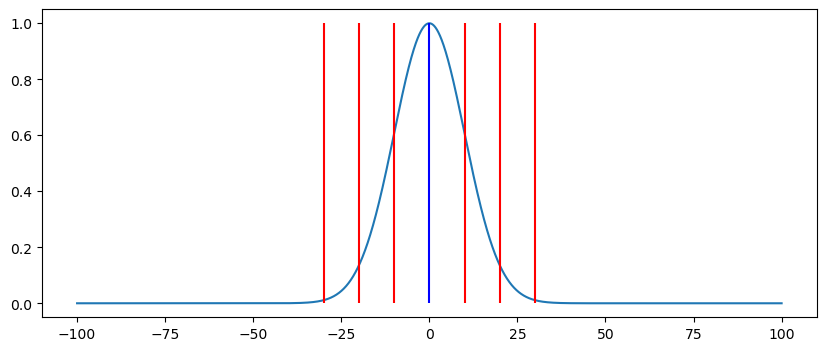

In [5]:

# The X and Y values for the plot below.

gaussianX = np.linspace(-100, 100, 3000)

sd = 10
mean = np.mean(gaussianX)

# Calculating gaussian Y values.
gaussianY = gaussian(mean, gaussianX, 1, sigma= sd)

plt.figure(figsize=(10, 4))
plt.plot(gaussianX, gaussianY)

# Below is the different standard deviation(s) from 1 to 3. The blue line is the mean.
plt.vlines(x=mean, colors=['b'], ymin=0, ymax=1)
for n in range(1, 4):
    plt.vlines(x=mean + n * sd, colors=['r'], ymin=0, ymax=1)
    plt.vlines(x=mean - n * sd, colors=['r'], ymin=0, ymax=1)


plt.show()


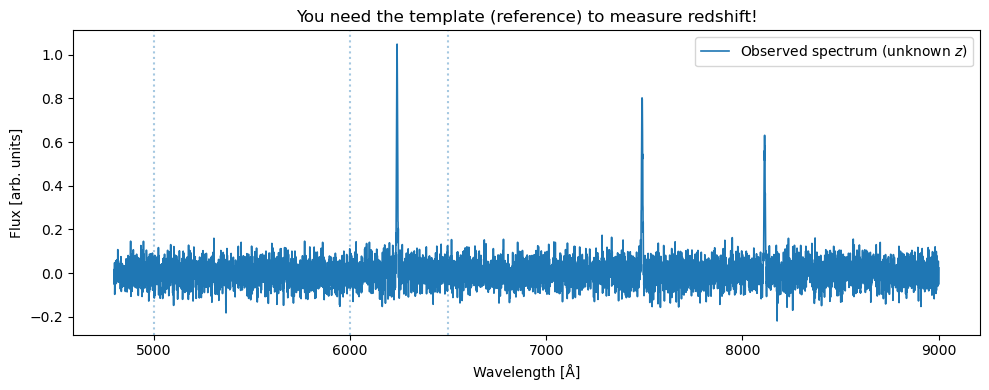

In [7]:
# ------------------------------------
# Apply a redshift to generate “data”
# ------------------------------------
z_true = np.random.random()                    # the unknown redshift we’ll try to recover
obs_lines = (1.0 + z_true) * rest_lines

observed_flux = np.zeros_like(wl)
for w0, amp in zip(obs_lines, amps):
    observed_flux += gaussian(wl, w0, amp)

# Add a touch of noise so it looks more realistic
rng = np.random.default_rng(42)
observed_flux += 0.05 * rng.normal(size=wl.size)

# ------------------------------------
# Plot: template vs. observed spectrum
# ------------------------------------


plt.figure(figsize=(10, 4))
plt.plot(wl, observed_flux, label=f"Observed spectrum (unknown $z$)", linewidth=1.2)

    #plt.scatter(peaks, wl[peaks])
#plt.plot(wl, template_flux, '--', label="Template (rest‑frame)", linewidth=1.2)

# Mark the *rest* wavelengths (dotted) and observed wavelengths (dash‑dot)
for w_rest, w_obs in zip(rest_lines, obs_lines):
    plt.axvline(w_rest, linestyle=':', alpha=0.4)
    #plt.axvline(w_obs,  linestyle='-.', alpha=0.4)


plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux [arb. units]")
plt.title("You need the template (reference) to measure redshift!")
plt.legend()
plt.tight_layout()
plt.show()